# Entrenamiento de SVM con características HOG+LBP
Este notebook carga las características HOG+LBP extraídas previamente y entrena un modelo SVM para la clasificación de frutas

In [1]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import joblib

# Rutas
BASE_DIR = os.path.dirname(os.path.abspath('.'))
HOG_LBP_DIR = os.path.join(BASE_DIR, 'HOG_LBP', 'hog_lbp_features')
MODELS_DIR = os.path.join(BASE_DIR, 'SVM', 'models')

print(f"Ruta de características HOG+LBP: {HOG_LBP_DIR}")
print(f"Ruta de modelos: {MODELS_DIR}")

Ruta de características HOG+LBP: /workspaces/fruit-detector-pricer/ProyectoFinal/HOG_LBP/hog_lbp_features
Ruta de modelos: /workspaces/fruit-detector-pricer/ProyectoFinal/SVM/models


In [2]:
def cargar_caracteristicas(split):
    features = []
    labels = []
    
    # Ruta del conjunto (train o test)
    split_path = os.path.join(HOG_LBP_DIR, split)
    
    # Obtener lista de clases
    clases = sorted([d for d in os.listdir(split_path) 
                    if os.path.isdir(os.path.join(split_path, d))])
    
    print(f"\nClases encontradas: {clases}")
    
    for clase in clases:
        clase_path = os.path.join(split_path, clase)
        archivos = [f for f in os.listdir(clase_path) if f.endswith('_hog_lbp.npy')]
        
        print(f"Cargando {len(archivos)} imágenes de {clase}...")
        
        for archivo in tqdm(archivos):
            # Cargar características
            feature_path = os.path.join(clase_path, archivo)
            feature = np.load(feature_path)
            
            features.append(feature)
            labels.append(clase)
    
    return np.array(features), np.array(labels)

# Cargar datos de entrenamiento y prueba
print("Cargando datos de entrenamiento...")
X_train, y_train = cargar_caracteristicas('train')

print("\nCargando datos de prueba...")
X_test, y_test = cargar_caracteristicas('test')

print(f"\nDimensiones de los datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

Cargando datos de entrenamiento...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 344 imágenes de Apple Red 1...


100%|██████████| 344/344 [00:00<00:00, 7241.47it/s]


Cargando 343 imágenes de Banana 1...


100%|██████████| 343/343 [00:00<00:00, 7317.26it/s]


Cargando 344 imágenes de Cantaloupe 2...


100%|██████████| 344/344 [00:00<00:00, 7524.59it/s]


Cargando 343 imágenes de Cocos 1...


100%|██████████| 343/343 [00:00<00:00, 7132.57it/s]


Cargando 342 imágenes de Granadilla 1...


100%|██████████| 342/342 [00:00<00:00, 7463.80it/s]


Cargando 326 imágenes de Kiwi 1...


100%|██████████| 326/326 [00:00<00:00, 7443.71it/s]


Cargando 343 imágenes de Maracuja 1...


100%|██████████| 343/343 [00:00<00:00, 6453.67it/s]


Cargando 516 imágenes de Peach 2...


100%|██████████| 516/516 [00:00<00:00, 6712.01it/s]


Cargando 490 imágenes de Pear Forelle 1...


100%|██████████| 490/490 [00:00<00:00, 6753.85it/s]


Cargando 343 imágenes de Pineapple Mini 1...


100%|██████████| 343/343 [00:00<00:00, 7162.65it/s]



Cargando datos de prueba...

Clases encontradas: ['Apple Red 1', 'Banana 1', 'Cantaloupe 2', 'Cocos 1', 'Granadilla 1', 'Kiwi 1', 'Maracuja 1', 'Peach 2', 'Pear Forelle 1', 'Pineapple Mini 1']
Cargando 148 imágenes de Apple Red 1...


100%|██████████| 148/148 [00:00<00:00, 9794.67it/s]


Cargando 147 imágenes de Banana 1...


100%|██████████| 147/147 [00:00<00:00, 10044.85it/s]


Cargando 148 imágenes de Cantaloupe 2...


100%|██████████| 148/148 [00:00<00:00, 9965.12it/s]


Cargando 147 imágenes de Cocos 1...


100%|██████████| 147/147 [00:00<00:00, 9989.35it/s]


Cargando 147 imágenes de Granadilla 1...


100%|██████████| 147/147 [00:00<00:00, 10038.47it/s]


Cargando 140 imágenes de Kiwi 1...


100%|██████████| 140/140 [00:00<00:00, 9866.30it/s]


Cargando 147 imágenes de Maracuja 1...


100%|██████████| 147/147 [00:00<00:00, 10103.61it/s]


Cargando 222 imágenes de Peach 2...


100%|██████████| 222/222 [00:00<00:00, 9985.58it/s]


Cargando 211 imágenes de Pear Forelle 1...


100%|██████████| 211/211 [00:00<00:00, 9299.03it/s]


Cargando 148 imágenes de Pineapple Mini 1...


100%|██████████| 148/148 [00:00<00:00, 8102.82it/s]


Dimensiones de los datos:
X_train: (3734, 8126)
X_test: (1605, 8126)


In [3]:
# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar SVM
print("Entrenando SVM...")
svm = SVC(kernel='rbf', C=10, probability=True)
svm.fit(X_train_scaled, y_train)

# Guardar el modelo y el scaler
joblib.dump(svm, os.path.join(MODELS_DIR, 'svm_hog_lbp.joblib'))
joblib.dump(scaler, os.path.join(MODELS_DIR, 'scaler_hog_lbp.joblib'))

# Evaluar en conjunto de prueba
y_pred = svm.predict(X_test_scaled)

# Imprimir reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Entrenando SVM...

Reporte de Clasificación:
                  precision    recall  f1-score   support

     Apple Red 1       1.00      1.00      1.00       148
        Banana 1       1.00      1.00      1.00       147
    Cantaloupe 2       1.00      1.00      1.00       148
         Cocos 1       1.00      1.00      1.00       147
    Granadilla 1       1.00      1.00      1.00       147
          Kiwi 1       1.00      1.00      1.00       140
      Maracuja 1       1.00      1.00      1.00       147
         Peach 2       1.00      1.00      1.00       222
  Pear Forelle 1       1.00      1.00      1.00       211
Pineapple Mini 1       1.00      1.00      1.00       148

        accuracy                           1.00      1605
       macro avg       1.00      1.00      1.00      1605
    weighted avg       1.00      1.00      1.00      1605



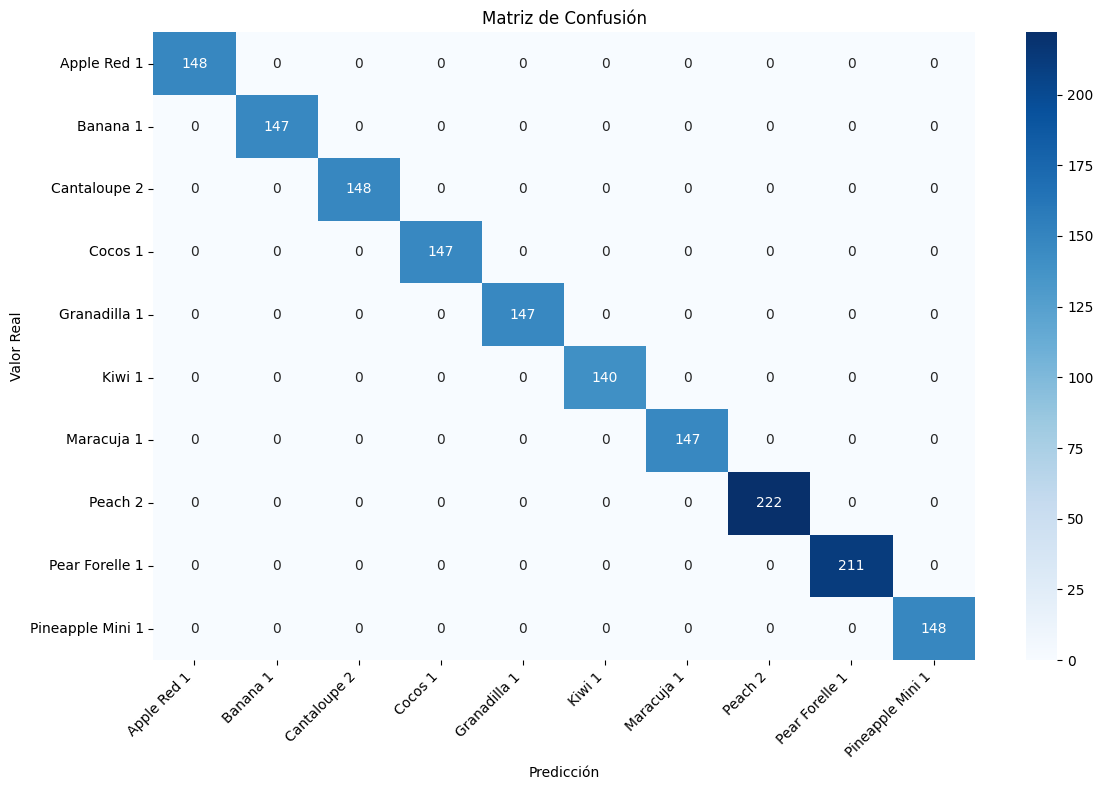


Matriz de confusión guardada en: /workspaces/fruit-detector-pricer/ProyectoFinal/SVM/models/confusion_matrix.png


In [5]:
# Visualizar matriz de confusión
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Guardar el gráfico primero
plt.savefig(os.path.join(MODELS_DIR, 'confusion_matrix.png'), dpi=300, bbox_inches='tight')

# Luego mostrar la figura
plt.show()

print("\nMatriz de confusión guardada en:", os.path.join(MODELS_DIR, 'confusion_matrix.png'))